# Análise Exploratória de Dados

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,Markdown

# Defina uma única cor azul repetida quatro vezes
blue_colors = ["#003f5c"] * 4

# Configure o estilo do Seaborn para usar esses tons de azul
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(blue_colors))

## 1. Leitura dos dados

In [24]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---

## 2. Descrição dos Dados

##### Os dados utilizados nesta análise são do famoso conjunto de dados do Titanic, que contém informações sobre os passageiros a bordo do navio. Este conjunto de dados é frequentemente utilizado em projetos de ciência de dados para análise e aprendizado de máquina.

### 2.1 Dicionário dos Dados

In [25]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,se o individuo esta vivo ou morto,qualitativa,nominal
1,pclass,Classe de ingresso,qualitativa,ordinal
2,sex,sexo,qualitativa,nominal
3,age,idade em anos,quantitativa,discreta
4,sibsp,# de irmãos/cônjuges a bordo do Titanic,quantitativa,discreta
5,parch,"# de pais/crianças a bordo do Titanic, 0 para ...",quantitativa,discreta
6,fare,Tarifa de passageiro,quantitativa,continua
7,embarked,Ponto de embarcacao,qualitativa,nominal
8,class,Se refere a classe social ou categoria que os ...,qualitativa,ordinal
9,who,informacao do genero (desnecessaria pois ja te...,qualitativa,nominal


##### • Temos então um total de 15 variáveis. Sendo 11 qualitativas(8 nominais e 2 ordinais), e temos 4 quantitativas(3 discretas e 1 continua).

---

## 3. Perguntas de Partida e Hipóteses

##### • Qual foi a taxa geral de sobrevivência?
##### • A taxa de sobrevivência variou entre homens e mulheres?
##### • A classe do ticket influenciou a chance de sobrevivência?
##### • Qual era a distribuição de idade dos passageiros?
##### • Crianças tinham maior taxa de sobrevivência do que adultos?
##### • A taxa de sobrevivência variou dependendo do porto de embarque?
##### • Passageiros viajando sozinhos tinham menor taxa de sobrevivência?
##### • Como a distribuição da idade dos passageiros variou entre os diferentes portos de embarque?

### 3.1 Qual foi a taxa geral de sobrevivência?


**Taxa de sobrevivência: 38.38%**

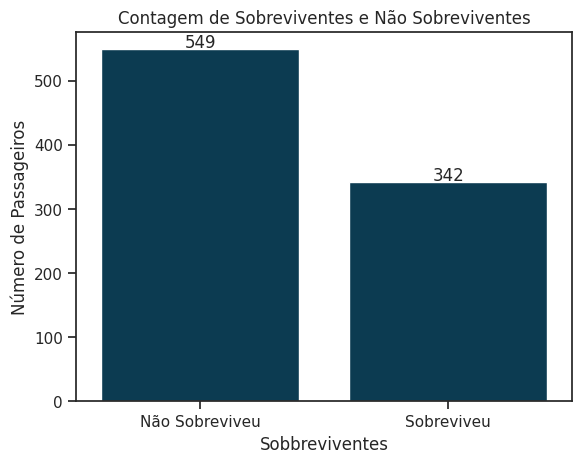

In [36]:
survival_rate = df['survived'].mean()
display(Markdown(f"**Taxa de sobrevivência: {survival_rate:.2%}**"))

# Gráfico de barras para visualizar a taxa de sobrevivência
ax = sns.countplot(x='survived', data=df)
plt.xlabel('Sobbreviventes')
plt.ylabel('Número de Passageiros')
plt.title('Contagem de Sobreviventes e Não Sobreviventes')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()

---

### 3.2 A taxa de sobrevivência variou entre homens e mulheres?


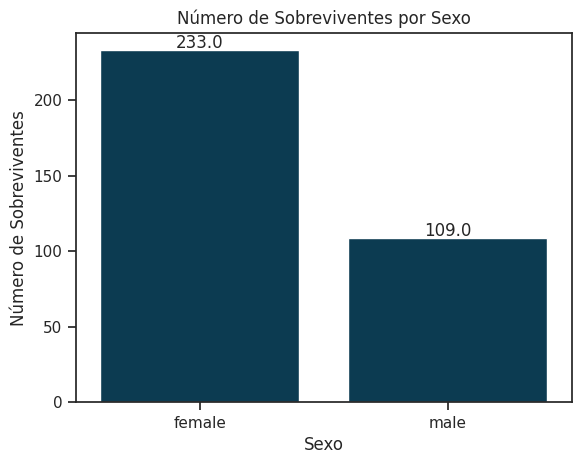

In [27]:
# Contagem de sobreviventes por sexo
survival_by_sex = df[df['survived'] == 1]['sex'].value_counts()

# Gráfico de barras para mostrar a contagem de sobreviventes por sexo
ax = sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.xlabel('Sexo')
plt.ylabel('Número de Sobreviventes')
plt.title('Número de Sobreviventes por Sexo')

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()

##### Ao observar a taxa de sobrevivência, constatamos que as mulheres tinham uma chance significativamente maior de sobreviver em comparação aos homens. Aproximadamente 74.2% das mulheres a bordo do Titanic sobreviveram, em contraste com apenas 18.9% dos homens. Essa disparidade pode ser atribuída às normas sociais e políticas da época, que priorizavam a evacuação de mulheres e crianças durante emergências.



---

### 3.3 A classe do ticket influenciou a chance de sobrevivência?

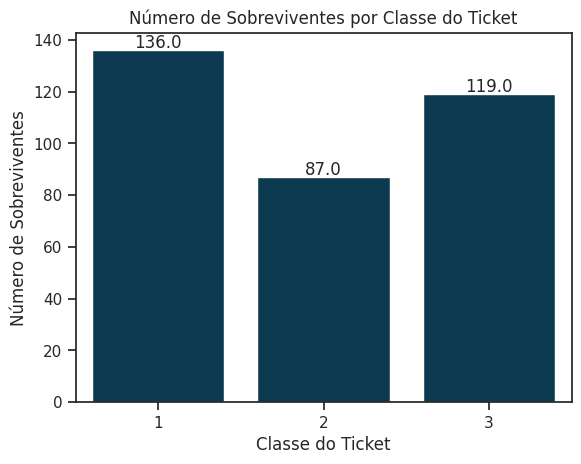

In [28]:
# Contagem de sobreviventes por classe de ticket
survival_by_class = df[df['survived'] == 1]['pclass'].value_counts().sort_index()

# Gráfico de barras para mostrar a contagem de sobreviventes por classe de ticket
ax = sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Classe do Ticket')
plt.ylabel('Número de Sobreviventes')
plt.title('Número de Sobreviventes por Classe do Ticket')

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()

##### -Agrupa os dados pela classe do ticket (pclass) e calcula a média de sobrevivência para cada classe. Isso revela se a classe do ticket influenciou a taxa de sobrevivência.
##### -Ajuda a entender se as pessoas em classes mais altas tiveram maior chance de sobrevivência em comparação com as de classes mais baixas.

---

### 3.4 Qual era a distribuição de idade dos passageiros?

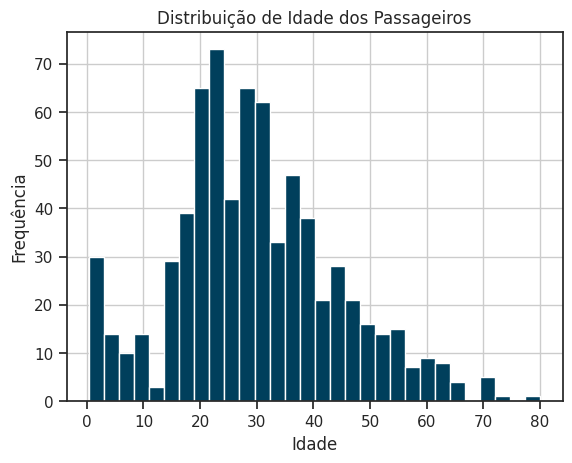

In [30]:
df['age'].hist(bins=30, color=blue_colors[0])  # Usa a cor azul definida
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Passageiros')
plt.show()

##### -Cria um histograma da idade dos passageiros, mostrando a frequência de cada faixa etária.

##### -Mostra como as idades estão distribuídas na amostra, permitindo identificar faixas etárias mais comuns e entender a composição etária do grupo.

---

### 3.5 Crianças tinham maior taxa de sobrevivência do que adultos?

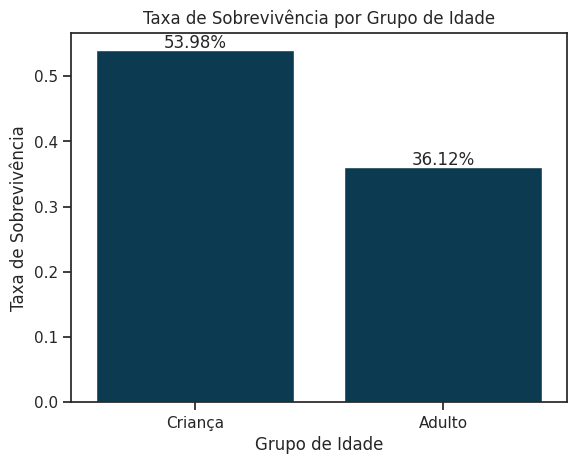

In [31]:
df['age_group'] = df['age'].apply(lambda x: 'Criança' if x < 18 else 'Adulto')

# Calcular a taxa de sobrevivência por grupo de idade
total_by_age_group = df['age_group'].value_counts()
survived_by_age_group = df[df['survived'] == 1]['age_group'].value_counts()
survival_rate_by_age_group = survived_by_age_group / total_by_age_group

# Gráfico de barras para mostrar a taxa de sobrevivência por grupo de idade
ax = sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values, order=['Criança', 'Adulto'])
plt.xlabel('Grupo de Idade')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Grupo de Idade')

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()

##### -Cria uma nova coluna age_group categorizando passageiros como 'Criança' ou 'Adulto', e calcula a taxa de sobrevivência para cada grupo.

##### -Permite verificar se crianças tinham maior taxa de sobrevivência do que adultos.

---

### 3.6 A taxa de sobrevivência variou dependendo do porto de embarque?

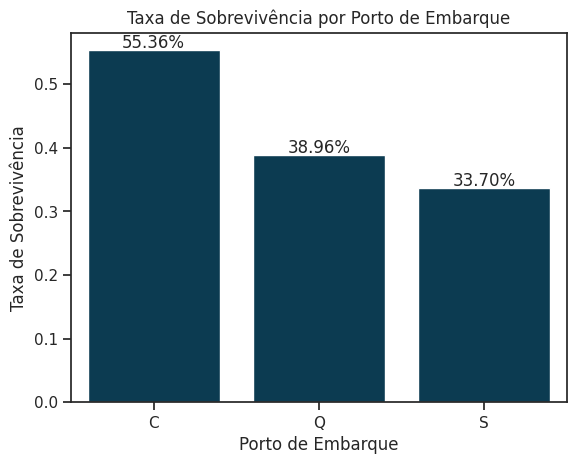

In [32]:
# Calcular a taxa de sobrevivência por porto de embarque
survival_by_embarked = df.groupby('embarked')['survived'].mean()

# Ordenar os portos de embarque pela taxa de sobrevivência (maior taxa à esquerda)
ordered_ports = survival_by_embarked.sort_values(ascending=False).index

# Gráfico de barras para mostrar a taxa de sobrevivência por porto de embarque
ax = sns.barplot(x=survival_by_embarked[ordered_ports].index, y=survival_by_embarked[ordered_ports].values)
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Porto de Embarque')

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()

##### -Agrupa os dados pelo porto de embarque (embarked) e calcula a média de sobrevivência para cada porto. Mostra se a taxa de sobrevivência variou com base no local de embarque.

##### -Ajuda a entender se o porto de embarque tinha algum impacto na chance de sobrevivência.

---

### 3.7 Passageiros viajando sozinhos tinham menor taxa de sobrevivência?

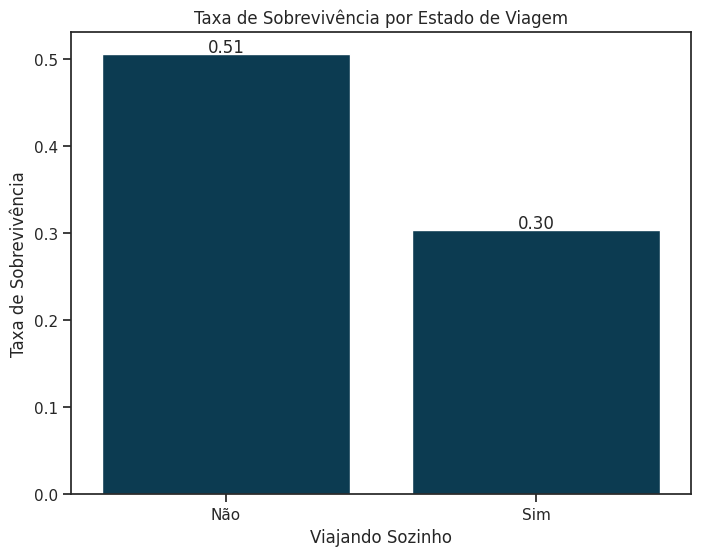

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_by_alone.index, y=survival_by_alone.values, palette=blue_colors)
plt.xlabel('Viajando Sozinho')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Estado de Viagem')
plt.xticks([0, 1], ['Não', 'Sim'])

# Adiciona valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

##### -Agrupa os dados pelo estado de viagem (alone) e calcula a média de sobrevivência para passageiros que estavam viajando sozinhos ou acompanhados.

##### -Permite verificar se passageiros viajando sozinhos tinham uma taxa de sobrevivência diferente em comparação com aqueles que viajavam acompanhados.

---

### 3.8 Como a distribuição da idade dos passageiros variou entre os diferentes portos de embarque?

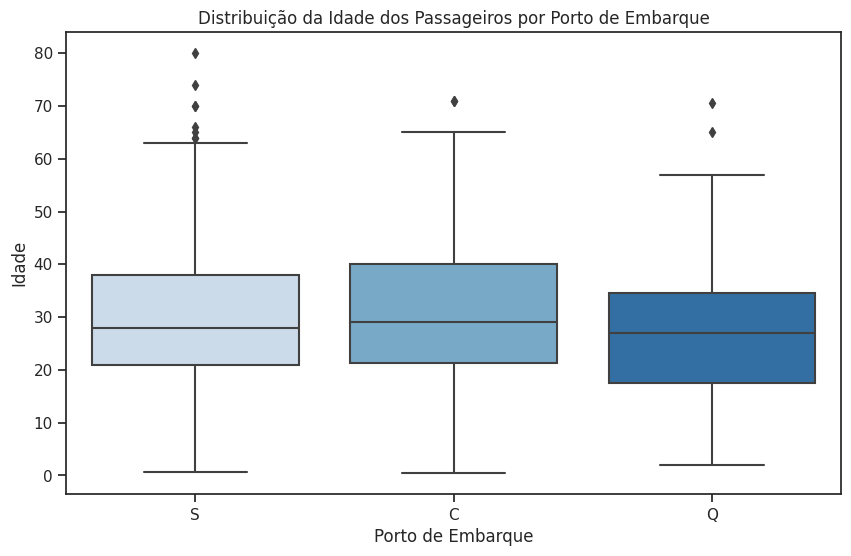

In [35]:
# Supondo que df seja o seu DataFrame e 'embarked' e 'age' são colunas existentes
plt.figure(figsize=(10, 6))
sns.boxplot(x='embarked', y='age', data=df, palette='Blues')
plt.xlabel('Porto de Embarque')
plt.ylabel('Idade')
plt.title('Distribuição da Idade dos Passageiros por Porto de Embarque')
plt.show()

##### - Identificar como as idades variavam entre os portos de embarque ajuda a entender a composição etária dos passageiros. Isso pode revelar se certos portos tinham predominantemente crianças, adultos ou idosos.

##### - O gráfico de boxplot fornece uma visão clara da distribuição etária entre diferentes portos de embarque, facilitando a comparação entre grupos. A pergunta é importante porque revela padrões demográficos que podem impactar a análise das chances de sobrevivência e as práticas de resgate durante o desastre.

---


## 3. Insights

##### Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

##### • Primeiro identificamos a taxa de sobrevivência do coonjunto de dados, que foi de 38,38%, com o total de passageiros de 891.
##### • A taxa de sobrevivência de mulheres é mais alta de que de homens, provavelmente pelas prioridades de salvamentos da época(mulheres e crianças).
##### • pessoas da primeira classe tem maior taxa de sobrevivência, provavelmente pela localização dos decks, ou por pessoas com mais recursos financeiros terem mais acesso a botes salva vidas, ou qualquer outro tipo de recurso que poderia ajudar.
##### • crianças tem maior chance de sobreviverem que adultos, indicando prioridade durante o resgate, nota-se que existe uma política de resgate.
##### • Existe uma indicação que pessoas que embarcavam em Cherbourg tinham melhores condições de resgate, ou estavam em áreas com mais recursos disponíveis, pois os mesmos tem maior taxa de sobrevivência.
##### • De acordo com o boxplot a cidade de Cherbourg tem uma população mais jovem, indicando o porquê o embarque nessa cidade tem uma taxa de sobrevivência mais alta, levando em conta a política de resgate.

---

## 4. Observação

##### Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.